In [3]:
import matplotlib.pyplot as plt
import numpy as np

import networkx as nx

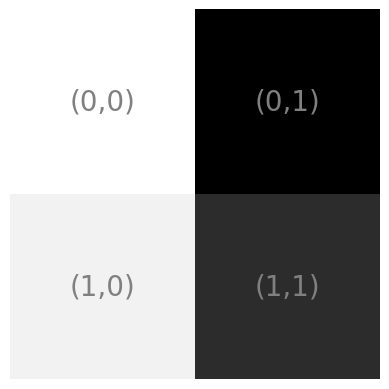

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Given data and parameters
height, width = 2, 2
image = np.array([
    [0.92, 0.35],
    [0.89, 0.45]
])

# Plot the image
plt.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
plt.axis('off')

# Annotate each pixel with its position
for (i, j), val in np.ndenumerate(image):
    plt.text(j, i, f'({i},{j})', ha='center', va='center', color='grey', fontsize=20)

# Save the image with annotations
plt.savefig("2x2_v2.jpg", dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()


In [45]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Given data and parameters
# height, width = 2, 2
# image = np.array([
#     [1, 0],
#     [1, 0]
# ])

# # Plot the image
# plt.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
# plt.axis('off')

# # Annotate each pixel with its position
# for (i, j), val in np.ndenumerate(image):
#     plt.text(j, i, f'({i},{j})', ha='center', va='center', color='grey', fontsize=20)

# # Save the image with annotations
# plt.savefig("2x2_v2.jpg", dpi=600, bbox_inches='tight', pad_inches=0)
# plt.show()


In [46]:
def image_to_grid_graph(gray_img, sigma=0.5):
  # Convert image to grayscale
  # gray_img = np.dot(img, [0.2989, 0.5870, 0.1140])
  h, w = gray_img.shape
  # Initialize graph nodes and edges
  nodes = np.zeros((h*w, 1))
  edges = []
  nx_elist = []
  # Compute node potentials and edge weights
  min_weight = 1
  max_weight = 0
  for i in range(h*w):
    x, y = i//w, i%w
    nodes[i] = gray_img[x,y]
    if x > 0:
      j = (x-1)*w + y
      # weight = np.exp(-dist.euclidean([gray_img[x,y]], [gray_img[x-1,y]])**2 / (2*sigma**2))
      weight = 1-np.exp(-((gray_img[x,y] - gray_img[x-1,y])**2) / (2 * sigma**2))
      edges.append((i, j, weight))
      nx_elist.append(((x,y),(x-1,y),np.round(weight,2)))
      if min_weight>weight:min_weight=weight
      if max_weight<weight:max_weight=weight
    if y > 0:
      j = x*w + y-1
      # weight = np.exp(-dist.euclidean([gray_img[x,y]], [gray_img[x,y-1]])**2 / (2*sigma**2))
      weight = 1-np.exp(-((gray_img[x,y] - gray_img[x,y-1])**2) / (2 * sigma**2))
      edges.append((i, j, weight))
      nx_elist.append(((x,y),(x,y-1),np.round(weight,2)))
      if min_weight>weight:min_weight=weight
      if max_weight<weight:max_weight=weight
  a=-1
  b=1
  min_weight = 1-np.exp(-((1 - 1)**2) / (2 * 0.5**2))
  max_weight = 1-np.exp(-((1 - 0)**2) / (2 * 0.5**2))
  normalized_edges = [(node1,node2,-1*np.round(((b-a)*((edge_weight-min_weight)/(max_weight-min_weight)))+a,2)) for node1,node2,edge_weight in edges]
  normalized_nx_elist = [(node1,node2,-1*np.round(((b-a)*((edge_weight-min_weight)/(max_weight-min_weight)))+a,2)) for node1,node2,edge_weight in nx_elist]
  return nodes, edges, nx_elist, normalized_edges, normalized_nx_elist



pixel_values, elist, nx_elist, normalized_elist, normalized_nx_elist = image_to_grid_graph(image)

pixel_values, elist, nx_elist, normalized_elist, normalized_nx_elist

(array([[0.92],
        [0.35],
        [0.89],
        [0.45]]),
 [(1, 0, 0.47784980364202023),
  (2, 0, 0.0017983809715627075),
  (3, 1, 0.019801326693244747),
  (3, 2, 0.32104470971143206)],
 [((0, 1), (0, 0), 0.48),
  ((1, 0), (0, 0), 0.0),
  ((1, 1), (0, 1), 0.02),
  ((1, 1), (1, 0), 0.32)],
 [(1, 0, -0.11), (2, 0, 1.0), (3, 1, 0.95), (3, 2, 0.26)],
 [((0, 1), (0, 0), -0.11),
  ((1, 0), (0, 0), 1.0),
  ((1, 1), (0, 1), 0.95),
  ((1, 1), (1, 0), 0.26)])

In [47]:
# G = nx.grid_2d_graph(image.shape[0], image.shape[1])

# # G.add_weighted_edges_from()
# G.add_weighted_edges_from(normalized_nx_elist)
# # G.add_weighted_edges_from(nx_elist)



# def draw(G):
#   plt.figure(figsize=(6,6))
#   default_axes = plt.axes(frameon=True)
#   pos = {(x,y):(y,-x) for x,y in G.nodes()}
#   print("Pos:",pos)
#   nx.draw_networkx(G,
#                   pos=pos,
#                   node_color=1-pixel_values,
#                   with_labels=True,
#                   node_size=3000,
#                   cmap=plt.cm.Greys,
#                   alpha=1,
#                   ax=default_axes)
#   nodes = nx.draw_networkx_nodes(G, pos, node_color=1-pixel_values,
#                   node_size=3000,
#                   cmap=plt.cm.Greys)
#   nodes.set_edgecolor('k')
#   edge_labels = nx.get_edge_attributes(G, "weight")
#   print(edge_labels)
#   nx.draw_networkx_edge_labels(G,
#                               pos=pos,
#                               edge_labels=edge_labels,
#                               font_size=20)
#   plt.axis('off')
#   plt.savefig("2x2_graph.jpg", dpi=600, bbox_inches='tight', pad_inches=1)
#   # plt.savefig("2x2_graph.jpg", dpi=600, pad_inches=1)
# draw(G)

Pos: {(0, 0): (0, 0), (0, 1): (1, 0), (1, 0): (0, -1), (1, 1): (1, -1)}
{((0, 0), (1, 0)): 1.0, ((0, 0), (0, 1)): -0.11, ((0, 1), (1, 1)): 0.95, ((1, 0), (1, 1)): 0.26}


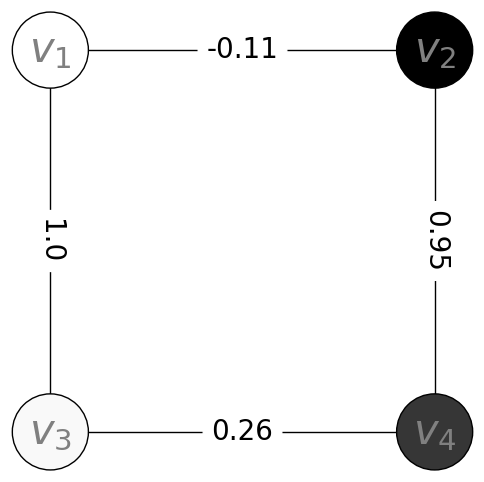

In [48]:
# Create the grid graph
G = nx.grid_2d_graph(image.shape[0], image.shape[1])
G.add_weighted_edges_from(normalized_nx_elist)  # Assuming this list is defined
def draw(G):
    plt.figure(figsize=(6,6))
    default_axes = plt.axes(frameon=True)
    pos = {(x,y):(y,-x) for x,y in G.nodes()}
    # Mapping from node positions to labels v_1, v_2, v_3, v_4
    labels = {(0, 0): r'$v_1$', (0, 1): r'$v_2$', (1, 0): r'$v_3$', (1, 1): r'$v_4$'}
    print("Pos:", pos)
  
    # Draw the graph using the position and custom labels
    nx.draw_networkx(G,
                     pos=pos, with_labels=False)
    nodes = nx.draw_networkx_nodes(G, pos, node_color=1-np.ravel(image),
                                   node_size=3000,
                                   cmap=plt.cm.Greys)
    nx.draw_networkx_labels(G, pos, labels, font_size=30, font_color='grey', ax=default_axes)
    nodes.set_edgecolor('k')
    edge_labels = nx.get_edge_attributes(G, "weight")
    print(edge_labels)
    nx.draw_networkx_edge_labels(G,
                                 pos=pos,
                                 edge_labels=edge_labels,
                                 font_size=20,
                                 font_color='black')
    plt.axis('off')
    plt.savefig("2x2_graph_v3.jpg", dpi=600, bbox_inches='tight', pad_inches=0)
draw(G)

In [ ]:
# Create the grid graph
G = nx.grid_2d_graph(image.shape[0], image.shape[1])
G.add_weighted_edges_from(normalized_nx_elist)  # Assuming this list is defined
def draw(G):
    plt.figure(figsize=(6,6))
    default_axes = plt.axes(frameon=True)
    pos = {(x,y):(y,-x) for x,y in G.nodes()}
    # Mapping from node positions to labels v_1, v_2, v_3, v_4
    labels = {(0, 0): r'$v_1$', (0, 1): r'$v_2$', (1, 0): r'$v_3$', (1, 1): r'$v_4$'}
    print("Pos:", pos)
  
    # Draw the graph using the position and custom labels
    nx.draw_networkx(G,
                     pos=pos, with_labels=False)
    nodes = nx.draw_networkx_nodes(G, pos, node_color=1-np.ravel(image),
                                   node_size=3000,
                                   cmap=plt.cm.Greys)
    nx.draw_networkx_labels(G, pos, labels, font_size=30, font_color='grey', ax=default_axes)
    nodes.set_edgecolor('k')
    edge_labels = nx.get_edge_attributes(G, "weight")
    print(edge_labels)
    nx.draw_networkx_edge_labels(G,
                                 pos=pos,
                                 edge_labels=edge_labels,
                                 font_size=20,
                                 font_color='black')
    plt.axis('off')
    plt.savefig("2x2_graph_v3.jpg", dpi=600, bbox_inches='tight', pad_inches=0)
draw(G)

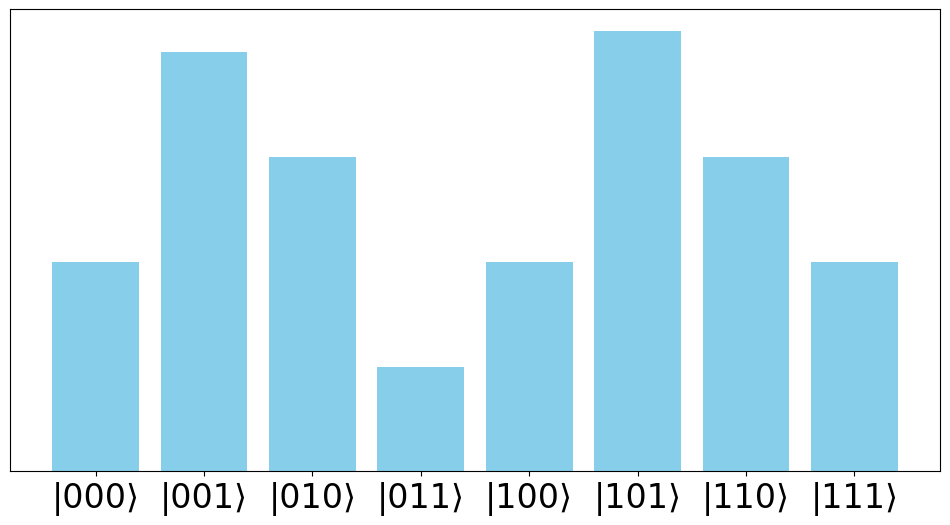

In [55]:
import matplotlib.pyplot as plt

# Defining the 8 possible binary values with 3 digits
bin_labels = ['|000⟩', '|001⟩', '|010⟩', '|011⟩', '|100⟩', '|101⟩', '|110⟩', '|111⟩']

# Generating random sample data for demonstration, ensuring it's within 0 to 1
sample_values = [0.1, 0.2, 0.15, 0.05, 0.1, 0.21, 0.15, 0.1]

# Creating the histogram
plt.figure(figsize=(12, 6))
plt.bar(bin_labels, sample_values, color='skyblue')

# Setting the axis labels and title
# plt.xlabel('Basis states', fontsize=18)  # Set font size for x-axis label
# plt.ylabel('Frequency', fontsize=18)
# plt.title('Measurement', fontsize=26)

# Setting font size for x-ticks

plt.xticks(fontsize=24)  # Set font size for x-ticks

# Hide the y-ticks
plt.yticks([])

# Show plot
plt.show()
